L2 REGULARISATION WITH HELP OF WEIGHT_DECAY

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np
import torchvision



# Hyperparameters
batch_size = 30
learning_rate = 10
num_epochs = 5
hidden_size = 32

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Define autoencoder model
class Autoencoder(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(input_size, 500),
            torch.nn.ReLU(),
            torch.nn.Linear(500, hidden_size),
            torch.nn.ReLU()
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(hidden_size, 500),
            torch.nn.ReLU(),
            torch.nn.Linear(500, input_size),
            torch.nn.Sigmoid()
        )
    
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_size = 28 * 28
model = Autoencoder(input_size, hidden_size)

# Define loss function and optimizer
criterion = torch.nn.MSELoss()



#Weight_decay=1e-5 captures the L2 reguralisation
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,weight_decay=0.00001)

params=list(model.parameters())
for p in params:
  print(p.size())

# Train the model
for epoch in range(num_epochs):
    loss=0
    for i, (images, _) in enumerate(train_loader):
        # Flatten images
        images = images.view(images.size(0), -1)


        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(loss,epoch)


        


100%|██████████| 9912422/9912422 [00:00<00:00, 344286647.32it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 23042741.83it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 133746376.77it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 14302198.77it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([500, 784])
torch.Size([500])
torch.Size([32, 500])
torch.Size([32])
torch.Size([500, 32])
torch.Size([500])
torch.Size([784, 500])
torch.Size([784])
tensor(0.0202, grad_fn=<MseLossBackward0>) 0
tensor(0.0141, grad_fn=<MseLossBackward0>) 1
tensor(0.0135, grad_fn=<MseLossBackward0>) 2
tensor(0.0109, grad_fn=<MseLossBackward0>) 3
tensor(0.0128, grad_fn=<MseLossBackward0>) 4


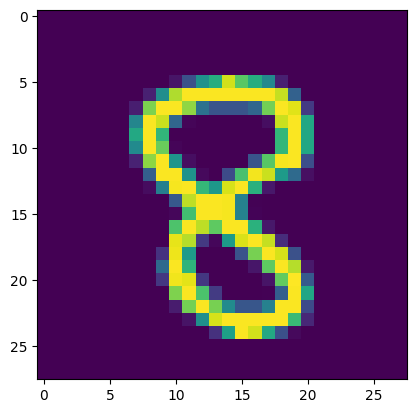

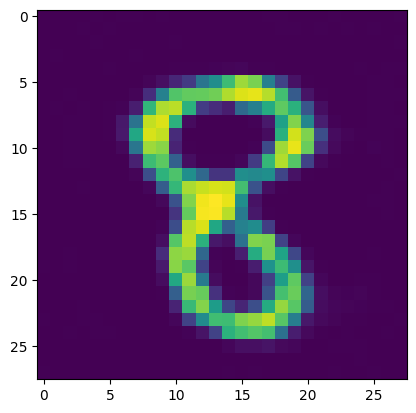

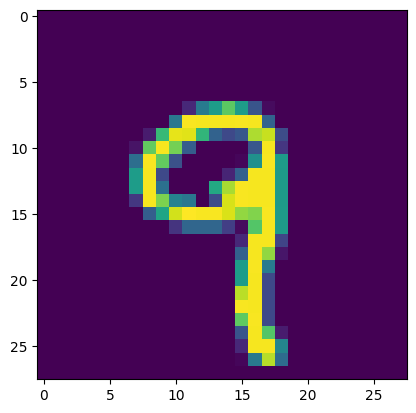

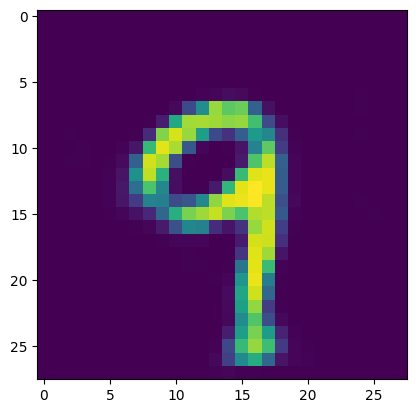

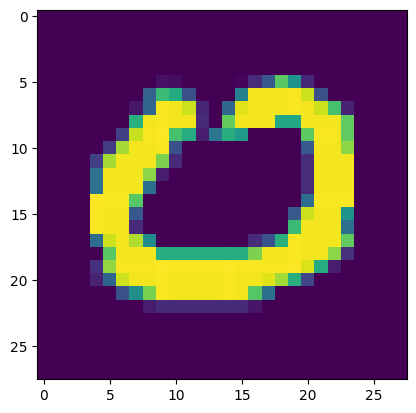

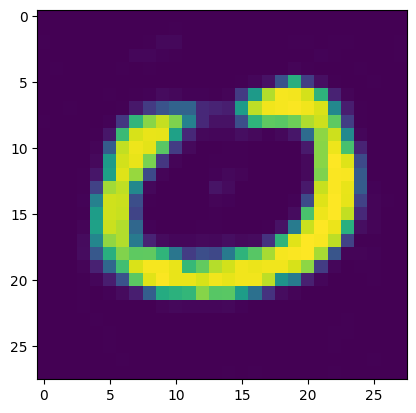

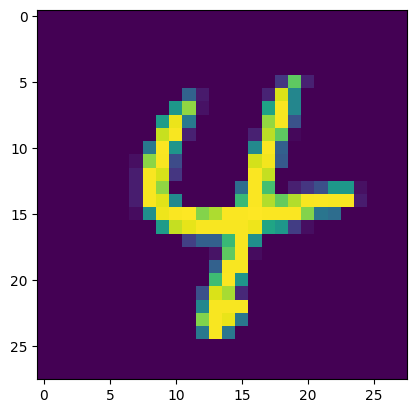

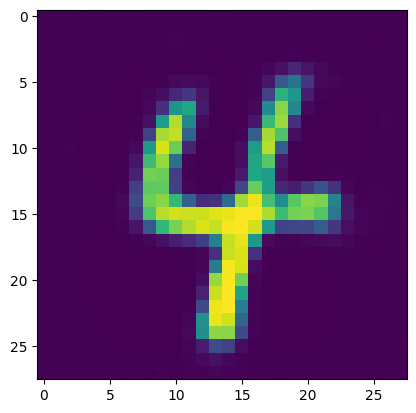

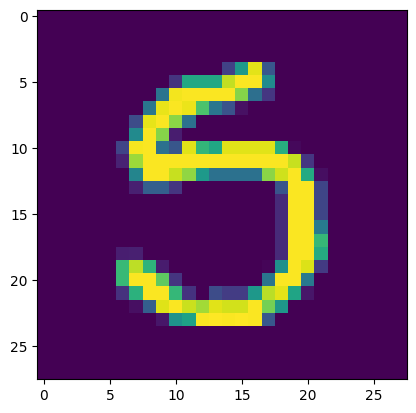

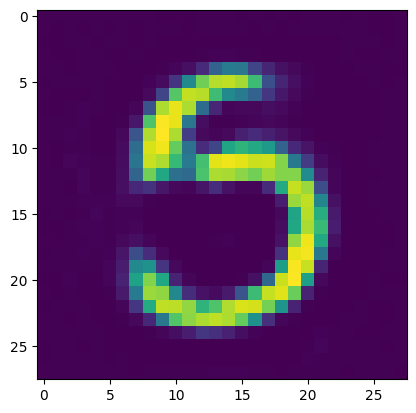

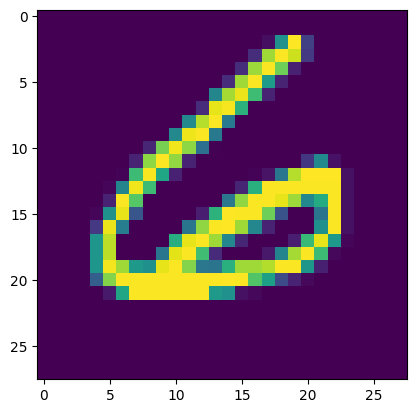

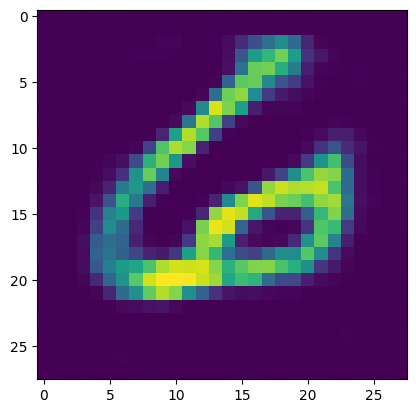

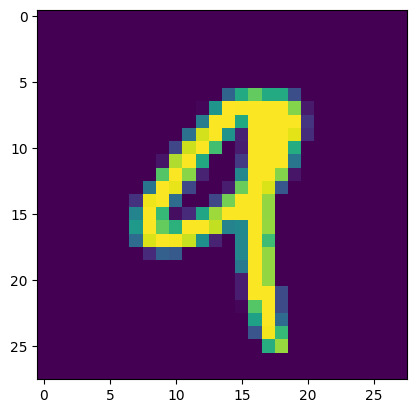

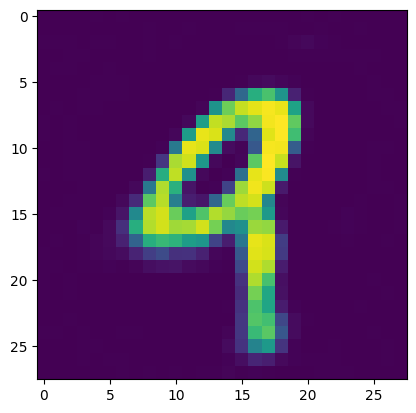

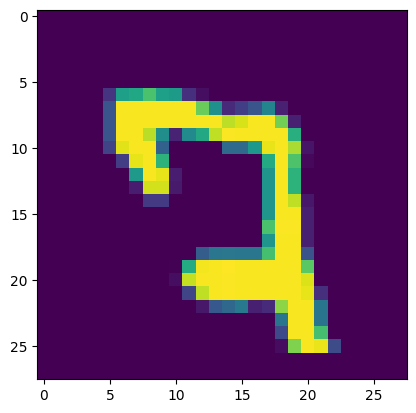

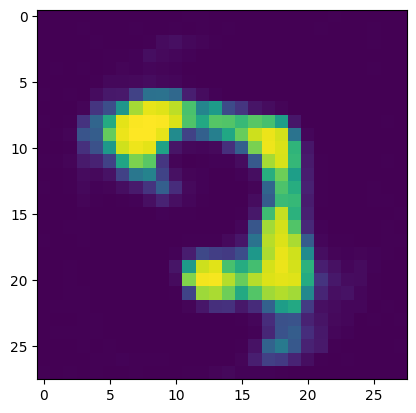

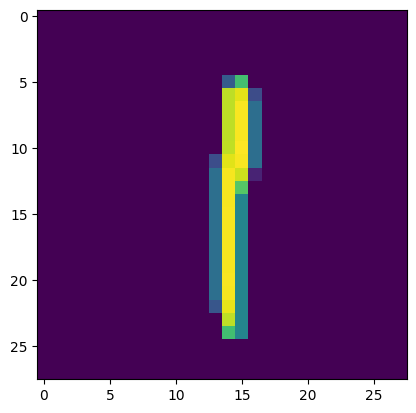

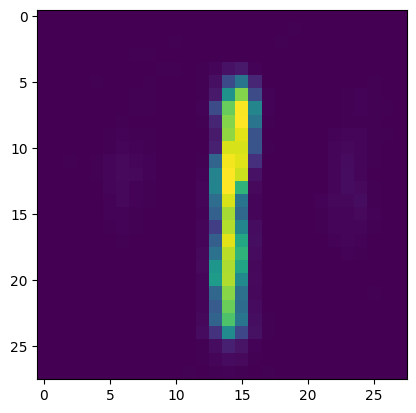

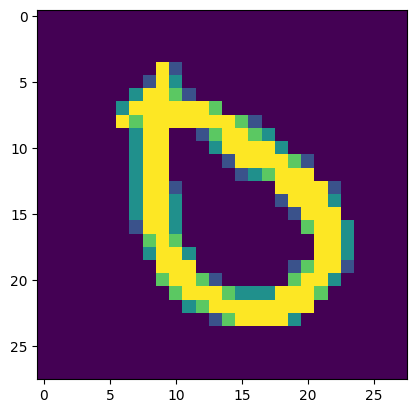

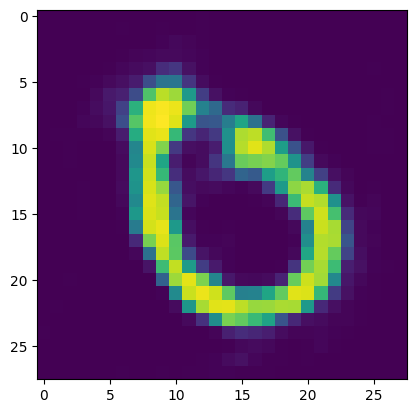

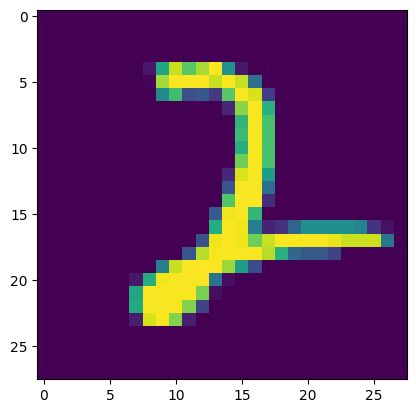

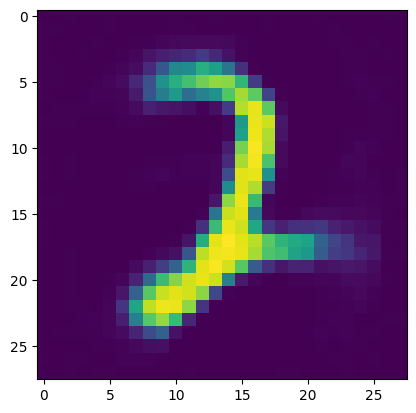

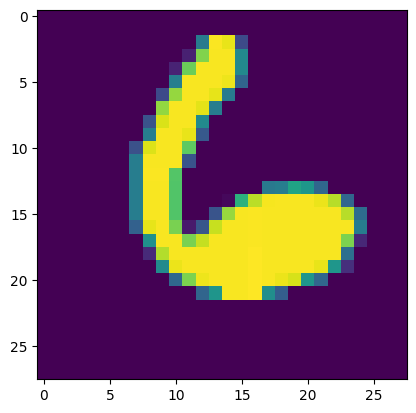

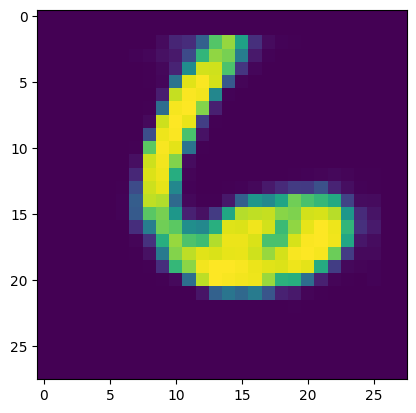

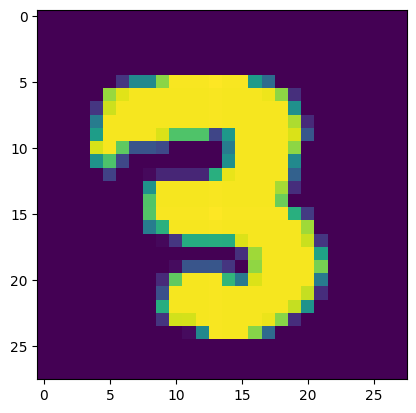

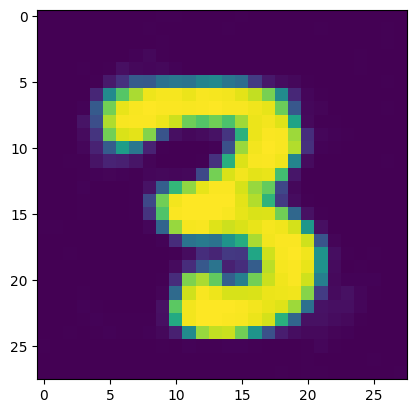

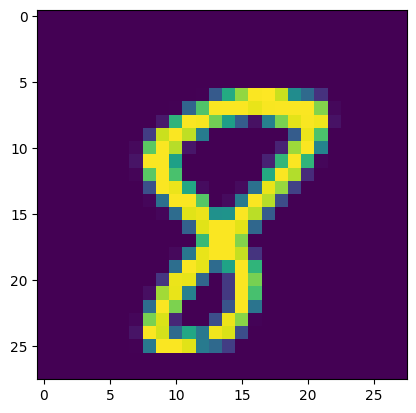

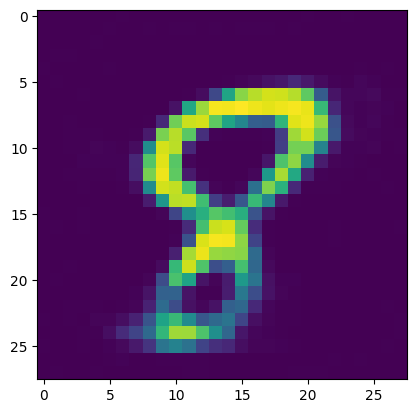

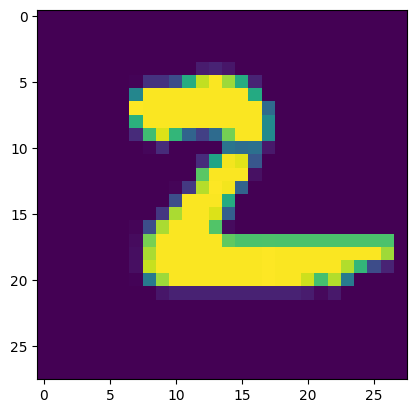

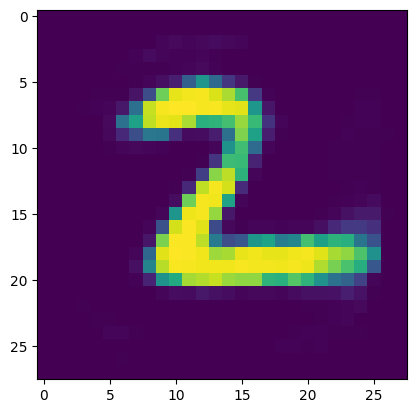

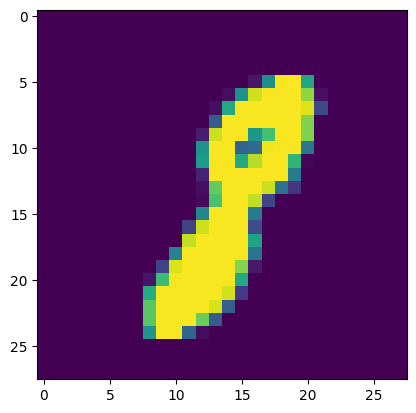

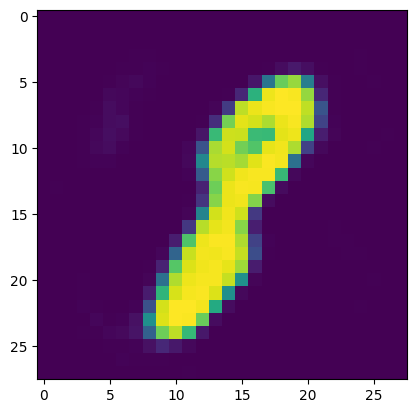

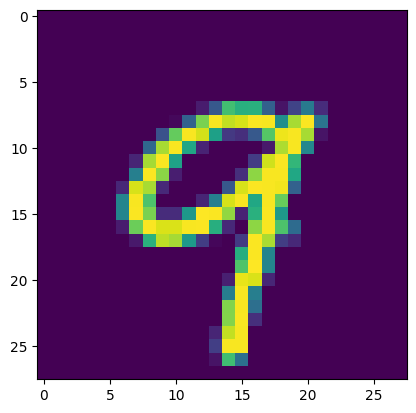

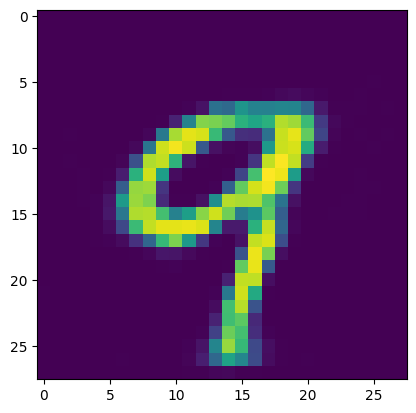

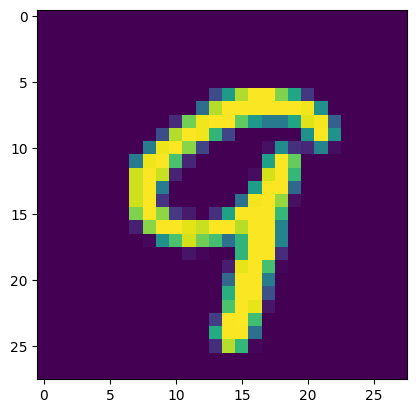

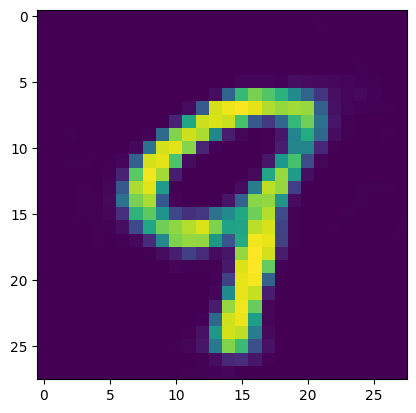

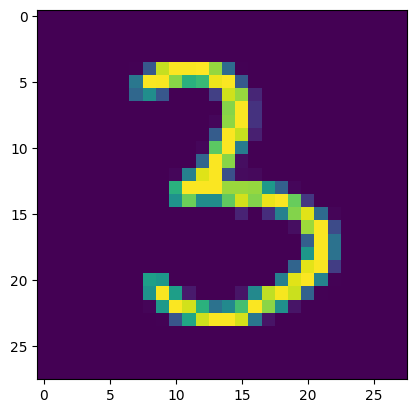

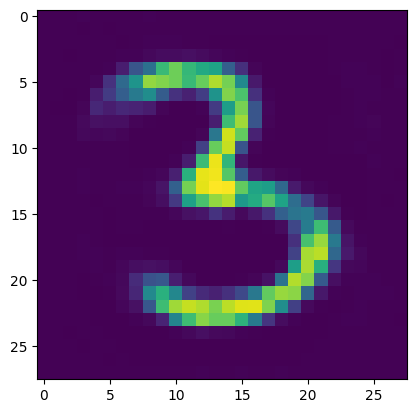

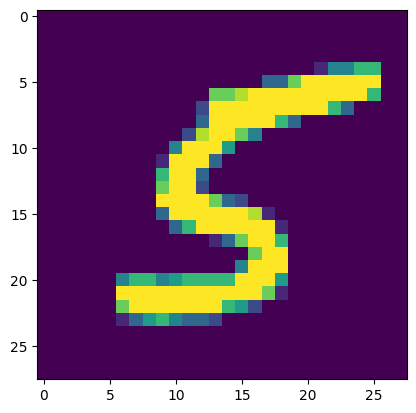

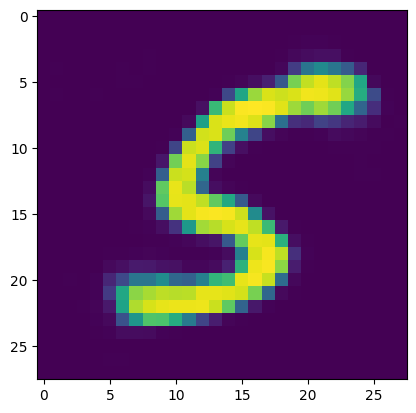

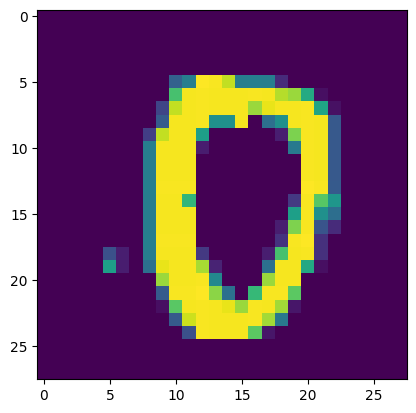

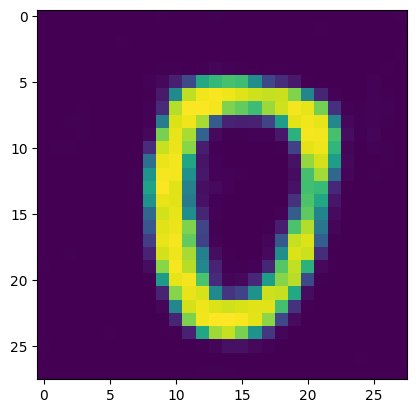

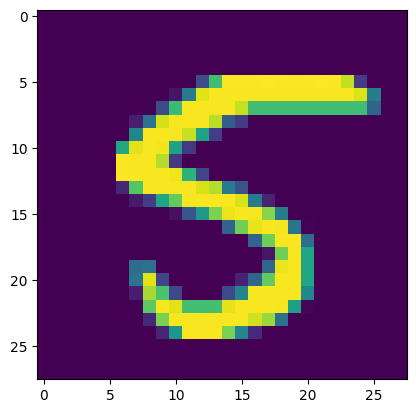

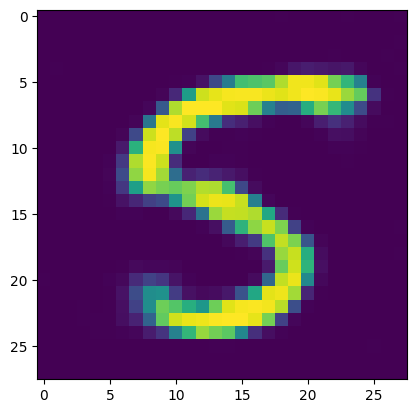

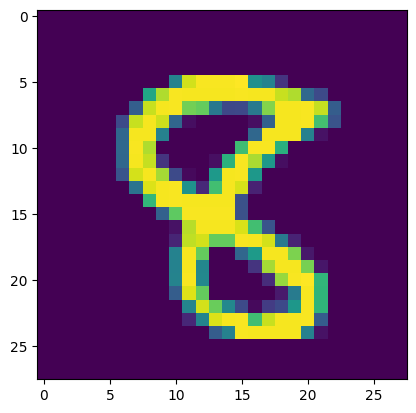

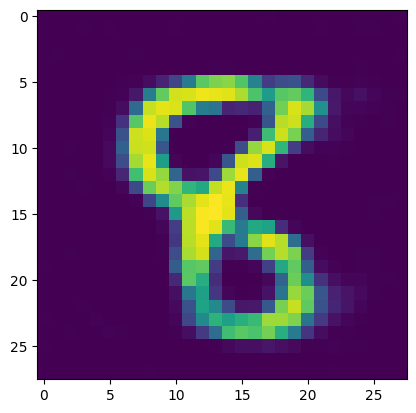

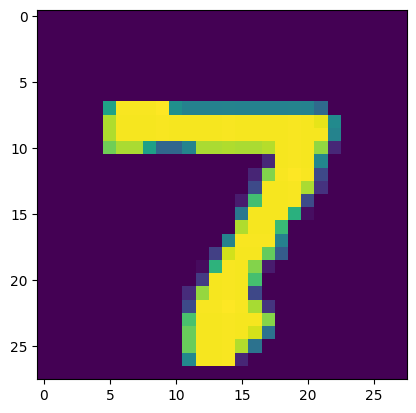

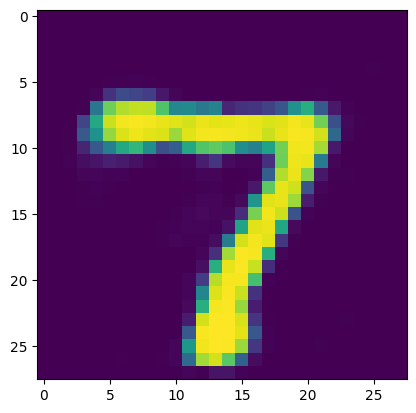

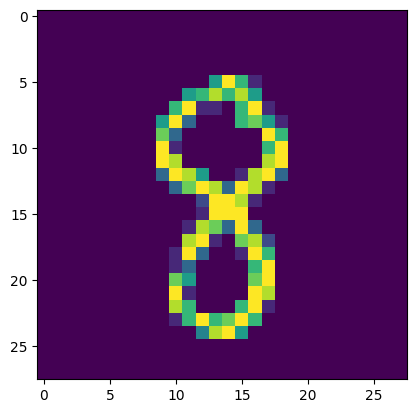

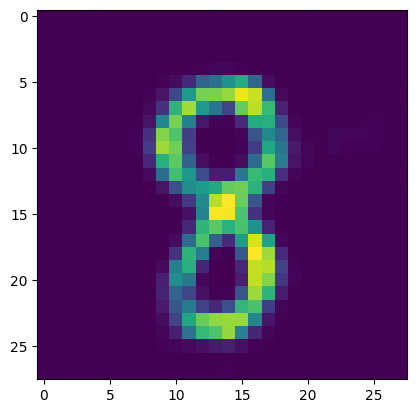

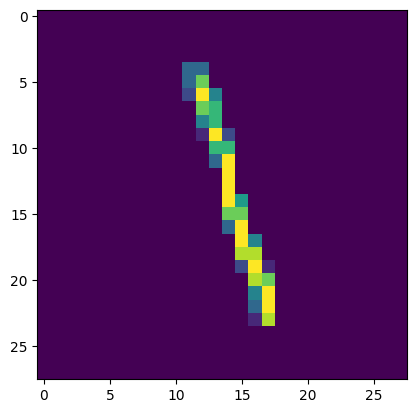

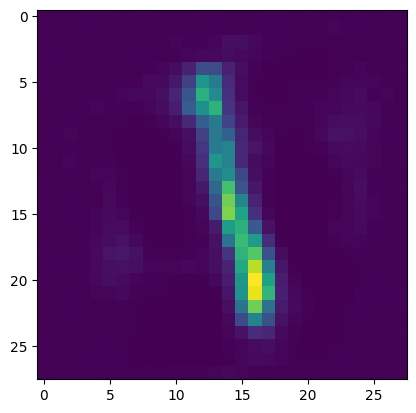

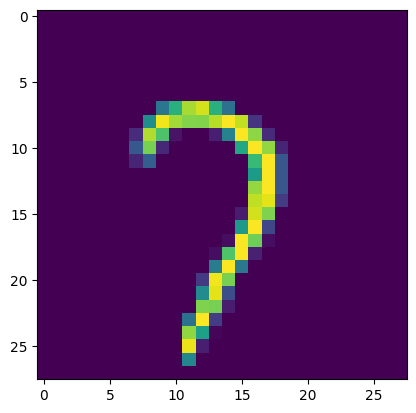

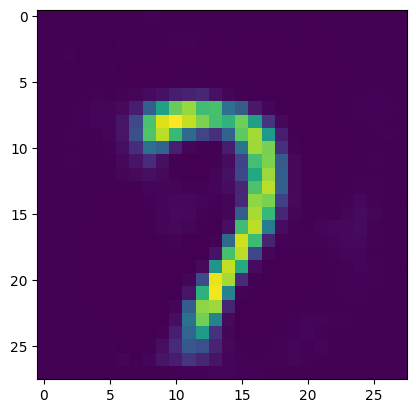

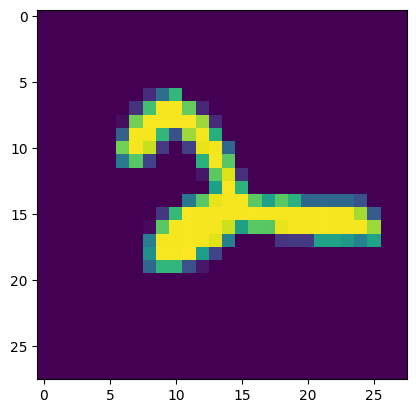

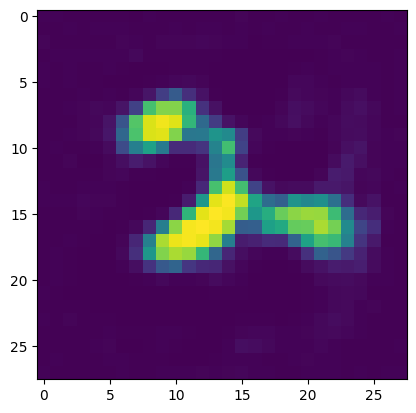

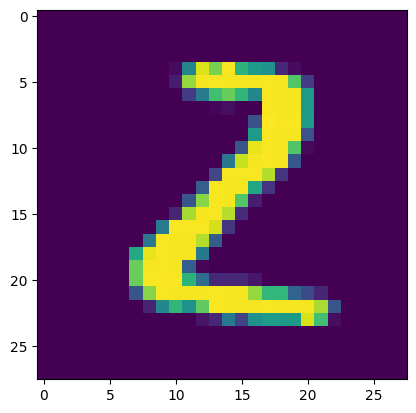

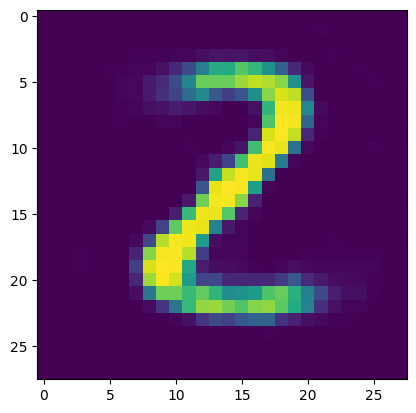

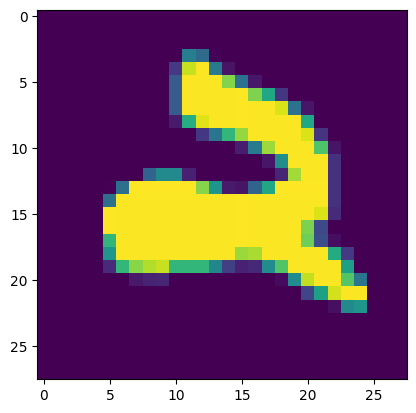

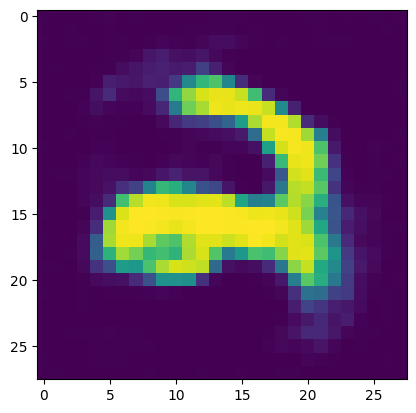

In [ ]:
for i,(images,_) in enumerate(train_loader):
  images = images.view(images.size(0), -1)
  for j in range(0,len(images)):
    plt.imshow(images[j].reshape(28,28))
    plt.show()
    plt.imshow(model(images[j].reshape(1,-1)).detach().numpy().reshape(28,28))
    plt.show()
  break;



In [ ]:
#calculating the training reconstruction loss
full_train_dataloader=torch.utils.data.DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=True)


for i,(all_img,_) in enumerate(full_train_dataloader):
  print(i)
  print(all_img.size())

all_img=all_img.view(all_img.size(0),-1)
print(all_img.size())

outputs=model(all_img)
reconstruction_loss=criterion(outputs,all_img)

print("reconstruction_loss",reconstruction_loss)



0
torch.Size([60000, 1, 28, 28])
torch.Size([60000, 784])
reconstruction_loss tensor(0.0111, grad_fn=<MseLossBackward0>)


SELF ATTENTION

In [ ]:
batch_size = 60


cifar10_train = dsets.CIFAR10(root='./data', train=True, download=True,transform=transforms.ToTensor())
cifar10_test = dsets.CIFAR10(root='./data', train=False, download=True,transform=transforms.ToTensor())


tran_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
tet_loader = torch.utils.data.DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


torch.Size([60, 3, 32, 32]) tensor([7, 7, 8, 7, 1, 2, 8, 9, 6, 9, 3, 2, 1, 4, 9, 4, 4, 7, 5, 0, 3, 9, 0, 6,
        3, 6, 0, 4, 0, 2, 9, 7, 9, 2, 5, 4, 6, 1, 1, 4, 7, 9, 0, 5, 1, 9, 8, 0,
        1, 4, 3, 0, 7, 5, 8, 9, 9, 3, 2, 5])


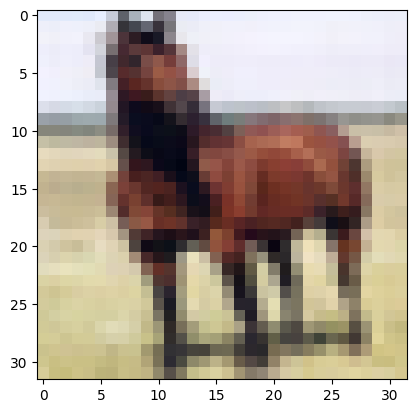

In [ ]:
image,label=next(iter(tran_loader))

print(image.size(),label)
plt.imshow(image[0].permute(1,2,0))

In [ ]:


class selfattend(torch.nn.Module):
    def __init__(self):
        super(selfattend, self).__init__()
        self.WQ=torch.nn.Linear(32*32,64)
        self.WK=torch.nn.Linear(32*32,64)
        self.WV=torch.nn.Linear(32*32,64)

    def forward(self,x):
        t1=x[:,0]
        t2=x[:,1]
        t3=x[:,2]
        t1=t1.view(t1.size(0), -1)
        t2=t2.view(t2.size(0),-1)
        t3=t3.view(t3.size(0),-1)
        # print("t1",t1.size())

        q1,k1,t1=[self.WQ(t1),self.WK(t1),self.WV(t1)]
        q2,k2,t2=[self.WQ(t2),self.WK(t2),self.WV(t2)]
        q3,k3,t3=[self.WQ(t3),self.WK(t3),self.WV(t3)]
        
        # print(q1.size(),k1.size())
        s1=torch.stack([torch.sum(q1 * k1, dim=1),torch.sum(q1 * k2, dim=1),torch.sum(q1 * k3, dim=1)])
        s2=torch.stack([torch.sum(q2 * k1, dim=1),torch.sum(q2 * k2, dim=1),torch.sum(q2 * k3, dim=1)])
        s3=torch.stack([torch.sum(q3 * k1, dim=1),torch.sum(q3 * k2, dim=1),torch.sum(q3 * k3, dim=1)])

        #xavier normalisation by dividing by sqrt(32*32)
        s1=s1.T/32
        s2=s2.T/32
        s3=s3.T/32
        
        # print("s1",s1.size())
        sof1=torch.nn.Softmax(dim=1)(s1)
        sof2=torch.nn.Softmax(dim=0)(s2)
        sof3=torch.nn.Softmax(dim=0)(s3)

        # print("soft[0]",torch.diag(sof1[:,0]).size())
        z1=torch.diag(sof1[:,0])@t1+torch.diag(sof1[:,1])@t2+torch.diag(sof1[:,2])@t3
        z2=torch.diag(sof2[:,0])@t1+torch.diag(sof2[:,1])@t2+torch.diag(sof2[:,2])@t3
        z3=torch.diag(sof3[:,0])@t1+torch.diag(sof3[:,1])@t2+torch.diag(sof3[:,2])@t3
        
        print(z1.size())
        
        coll=[]
        for i in range(0,batch_size):
          temp=torch.stack([z1[i],z2[i],z3[i]])
          coll.append(temp)

        return torch.stack(coll).reshape(32,3,-1,8)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.relu1 = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.relu2 = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2)
        self.fc1 = torch.nn.Linear(60 * 2 * 2, 64)
        self.relu3 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)

        # print(x.size())
        x = self.pool2(x)
        print(x.size())
        x = x.view(x.size(0),-1)
        # print(x.size())
        x = self.fc1(x)
        # print(x.size())
        x = self.relu3(x)
        x = self.fc2(x)
        # print(x.size())
        return torch.nn.Softmax(dim=1)(x)


model=selfattend()
x=image
print(x[:,0].size())
y=model(image)

model1=SimpleCNN()

print("y",y[0].size())
ou=model1(y)


torch.Size([60, 32, 32])
torch.Size([60, 64])
y torch.Size([3, 15, 8])
torch.Size([32, 32, 3, 2])


RuntimeError: ignored

In [ ]:
# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(tran_loader):
        
        # Forward pass
        outputs = model1(model(images))
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print the loss every 1000 iterations
        if (i+1) % 1000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, len(tran_loader), loss.item()))


torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([3

IndexError: ignored